# API CoinMarketCap setup for Crypto Analysis

In this notebook we will show how to use the CoinMarketCap API to extract historical data. We will then do an analysis to compare the performance of altcoins vs bitcoin during a 30 day period where bitcoin is very unstable and stuck in a range around 100'000 USD that is neither bear nor bull market. It's hard to know if bitcoin will then turn into a bear or bull market and because of this uncertainty, almost all altcoins start dropping significantly

#### API to extract historical data on CoinMarketCap

In [11]:
import pandas as pd
from pandas import json_normalize
import numpy as np
import requests
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
from IPython.display import Image
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

In [22]:
# Function to create a formatted string of the Python JSON object to better see the data 
def jprint(obj):  
    text = json.dumps(obj, sort_keys=True, indent=4) 
    print(text) 

In [23]:
from datetime import datetime, timedelta
date_today = datetime.today()

# Extract Data with API
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/historical'

# With my current subscription i am only allowed to access data of last 30 days
# For entire historical data, need to subscribe to entreprise plan on coinmarketcap

for d in range(1,29) :   
    # We loop through the last 30 days and assign the selected date to "dates"
    dates = (date_today - timedelta(days=d)).strftime('%Y-%m-%d')

    parameters = {
        'date' : dates,
        'start':'1',
        'limit':'10',        # limit corresponds to how many coins we want to extract
        'convert':'USD'
                }
    headers = {
        'Accepts': 'application/json',
        #'X-CMC_PRO_API_KEY': insert_API_key_from_coin_market_cap,
            }
    
    session = Session()
    session.headers.update(headers)
    
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)                       #in case we want to check extract is working
        #jprint(response.json())           #in case we want to check extract is working

        # For the first date we create the base dataframe
        if d == 1 :
            df_1 = json_normalize(data, "data")
            # The date column of the data is not included in the API so we add it manually
            df_1['date_data'] = dates
            
        # For the dates following the first date we append the data to the base dataframe
        else :
            df_to_append = json_normalize(data, "data")
            df_to_append['date_data'] = dates
            df_1 = pd.concat([df_1, df_to_append], ignore_index=True)
    
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

In [24]:
# Sort the data by id and date
df_1 = df_1.sort_values(by=['id', 'date_data'])

In [25]:
df_1.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,date_data
270,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,19809381.0,19809381.0,False,NaN,1,None,None,None,2025-02-09T15:03:00.001Z,94488.441062,2.088513e+10,0.676039,-0.082643,-3.892102,1.871758e+12,2025-02-09T15:03:00.001Z,NaN,NaN,NaN,NaN,NaN,2025-01-12
260,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,19809512.0,19809512.0,False,NaN,1,None,None,None,2025-02-09T15:02:59.822Z,94516.525627,7.297900e+10,0.287895,0.029723,-7.563309,1.872326e+12,2025-02-09T15:02:59.822Z,NaN,NaN,NaN,NaN,NaN,2025-01-13
250,1,Bitcoin,BTC,bitcoin,11861,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,19810265.0,19810265.0,False,NaN,1,None,None,None,2025-02-09T15:02:59.648Z,96534.044215,5.376968e+10,-0.136997,2.134567,-0.401001,1.912365e+12,2025-02-09T15:02:59.649Z,NaN,NaN,NaN,NaN,NaN,2025-01-14
240,1,Bitcoin,BTC,bitcoin,11865,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,19810759.0,19810759.0,False,NaN,1,None,None,None,2025-02-09T15:02:59.471Z,100504.493441,5.780592e+10,0.753039,4.113004,5.745757,1.991070e+12,2025-02-09T15:02:59.471Z,NaN,NaN,NaN,NaN,NaN,2025-01-15
230,1,Bitcoin,BTC,bitcoin,11868,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,19811103.0,19811103.0,False,NaN,1,None,None,None,2025-02-09T15:02:59.296Z,100033.417748,5.373683e+10,0.277182,-0.468711,8.162901,1.981772e+12,2025-02-09T15:02:59.296Z,NaN,NaN,NaN,NaN,NaN,2025-01-16


In [27]:
# Save into csv file
df_1.to_csv('coinmarketcap_data.csv', index=False)

#### Crypto Analysis : Plotting top 100 coins when bitcoin is in unclear phase

In [3]:
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 10000)

In [4]:
df = pd.read_csv('data_downloaded/coinmarketcap_data_20250110-20250208_top_100.csv')

In [5]:
df1 = df.copy()

In [6]:
df1.head(2)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,date_data
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,19808412.0,19808412.0,False,NaN,1,NaN,NaN,NaN,2025-02-09T13:55:23.636Z,94701.456463,6.205869e+10,-0.018351,2.397624,-3.471676,1.875885e+12,2025-02-09T13:55:23.636Z,NaN,NaN,NaN,NaN,NaN,2025-01-10
1,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,19808856.0,19808856.0,False,NaN,1,NaN,NaN,NaN,2025-02-09T13:55:23.387Z,94566.593675,1.886089e+10,-0.051150,-0.142408,-3.735521,1.873256e+12,2025-02-09T13:55:23.387Z,NaN,NaN,NaN,NaN,NaN,2025-01-11


In [7]:
# Create df that has only prices of the first date. We will join this to the original dataframe to get a column with price_T0
df_price_T0 = df1[['id', 'name', 'quote.USD.price', 'date_data']]
df_price_T0 = df_price_T0[df_price_T0['date_data'] == '2025-01-10']

# Create col price_T0
df_price_T0['price_T0'] = df_price_T0['quote.USD.price'] 

# Join back to initial df
df1 = df1.merge(df_price_T0[['id', 'price_T0']], how='left', left_on='id', right_on='id', suffixes=('_left', '_right'))

# Create price variance = price_Tx / price_T0 - 1
# The purpose of this metric is to plot the variance of the price, rather than the price itself, so that we can put all coins on 1 chart and have them comparable.
df2 = df1
df2['price_var'] = df2['quote.USD.price'] / df2['price_T0'] - 1

# Get the first tag to have categories
df2['first_tag'] = df2['tags'].str.extract(r'(\w+)')

# Drop Stablecoins
df2 = df2[df2['first_tag'] != 'stablecoin']

# Drop USDC because the first_tag wasn't labled stablecoin
df2 = df2[df2['name'] != 'USDC']

# Drop Syscoin because there's only 1 row
df2 = df2[df2['name'] != 'Syscoin']

# Drop "POL (prev. MATIC)" because strange data
df2 = df2[df2['name'] != 'POL (prev. MATIC)']

In [8]:
df2.head(2)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,date_data,price_T0,price_var,first_tag
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,19808412.0,19808412.0,False,NaN,1,NaN,NaN,NaN,2025-02-09T13:55:23.636Z,94701.456463,6.205869e+10,-0.018351,2.397624,-3.471676,1.875885e+12,2025-02-09T13:55:23.636Z,NaN,NaN,NaN,NaN,NaN,2025-01-10,94701.456463,0.000000,mineable
1,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,19808856.0,19808856.0,False,NaN,1,NaN,NaN,NaN,2025-02-09T13:55:23.387Z,94566.593675,1.886089e+10,-0.051150,-0.142408,-3.735521,1.873256e+12,2025-02-09T13:55:23.387Z,NaN,NaN,NaN,NaN,NaN,2025-01-11,94701.456463,-0.001424,mineable


Over the timeframe of 2025-01-10 to 2025-02-08 the price of bitcoin starts from around 94'700 USD, peaks around 106'000 USD on 2025-01-21 and then comes back down to 96'500 USD on 2025-02-08. The red section in the chart below (screenshot from CoinMarketCap) is the timeframe for which we will plot the altcoins.

During this timeframe, it is unclear if bitcoin will crash or go back into bull phase. What we observe then in the next chart containing the plot of all coins is that almost all the altcoins fall significantly when bitcoin is in this unclear phase. 

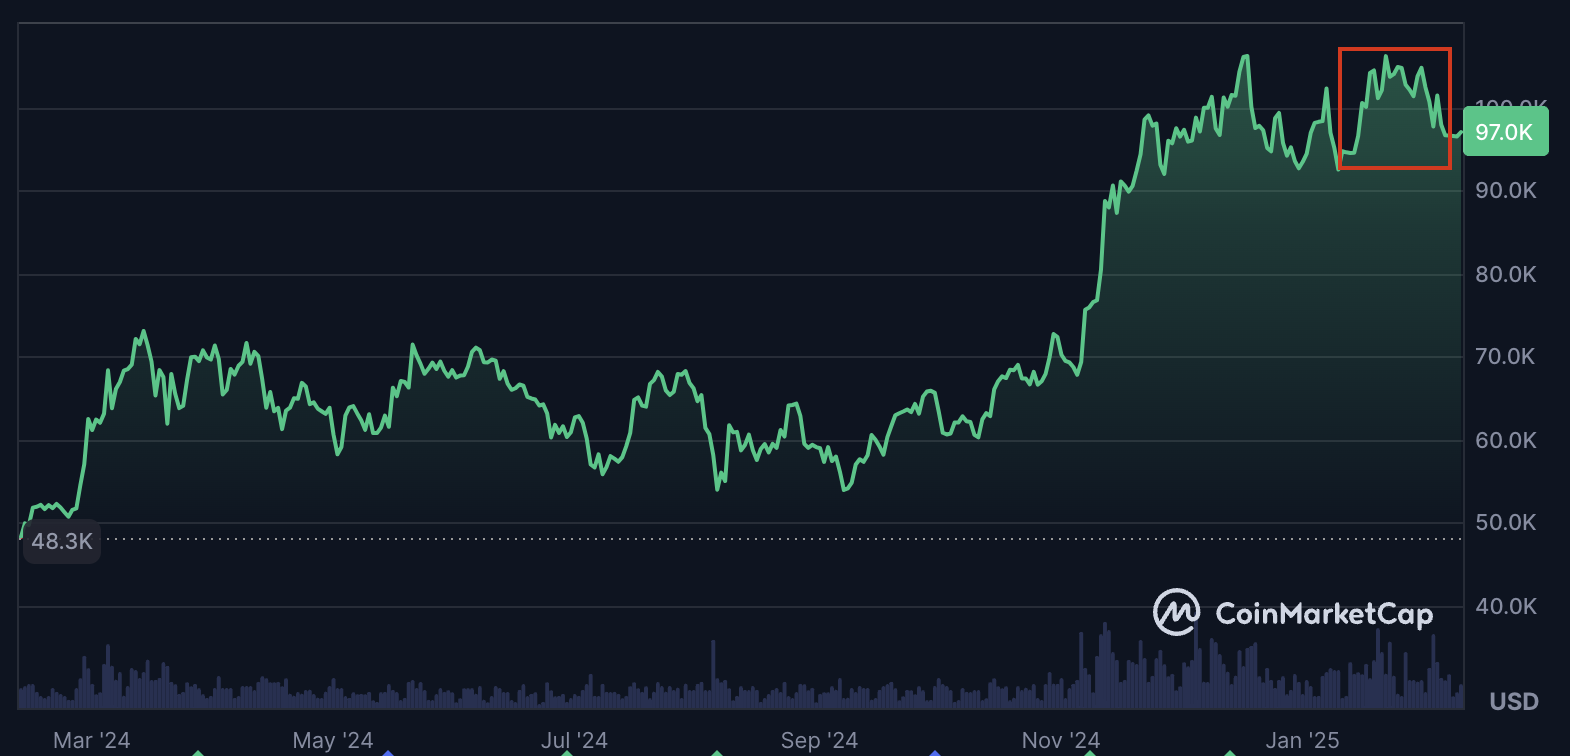

In [3]:
Image("bitcoin_timeframe_2025-01-10_2025-02-08.png")

In [11]:
#define index column
df3 = df2.copy()
df3.set_index('date_data', inplace=True)

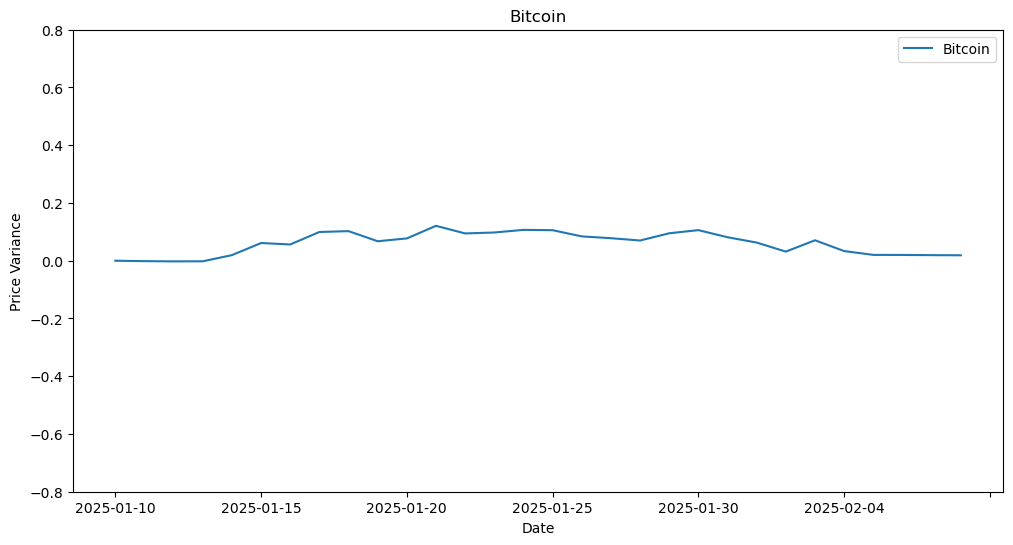

In [12]:
# Bitcoin plot alone
# We plot bitcoin using the same y axis limits that we will need when plotting all coins. Therefore the curve looks a blit flat.
df_btc = df3[df3['symbol'] == 'BTC']
df_btc.groupby('name')['price_var'].plot(legend=True, figsize = [12,6], xlabel = 'Date', ylabel = 'Price Variance', ylim = [-0.8,0.8], title = 'Bitcoin')
plt.show()

The line plot of bitcoin here looks flat because we set the y limits of price variance from -80% to +80% because in the next chart we plot the top 100 coins with the same limits, and those coins have a much higher variance than bitcoin. What we observe in the plot below of top 100 altcoins, is that only about 10% of altcoins remain around the same price without falling significantly. And the longer bitcoin remains in this price range, the more the altcoins fall. The vast majority get hit by -40%. Unfortunately with my current subscription i can only pull the last 30 days of historical data (To get all data you need the entreprise plan). If we were to look at all historical data, we would see that over time, almost all altcoins fade to -100% (in other words a price of 0). The only coin that keeps gaining value is bitcoin.

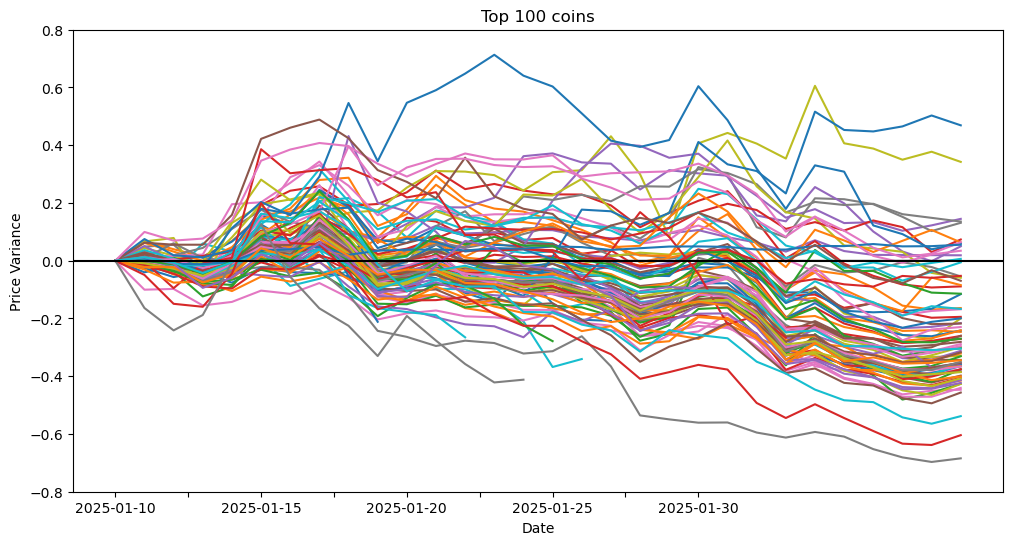

In [13]:
# Top 100 coins plot
df3.groupby('name')['price_var'].plot(legend=False, figsize = [12,6], xlabel = 'Date', ylim = [-0.8,0.8], ylabel = 'Price Variance', title = "Top 100 coins")
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

For meme coins it's even worse. None of them survive above 0%, they all crash.

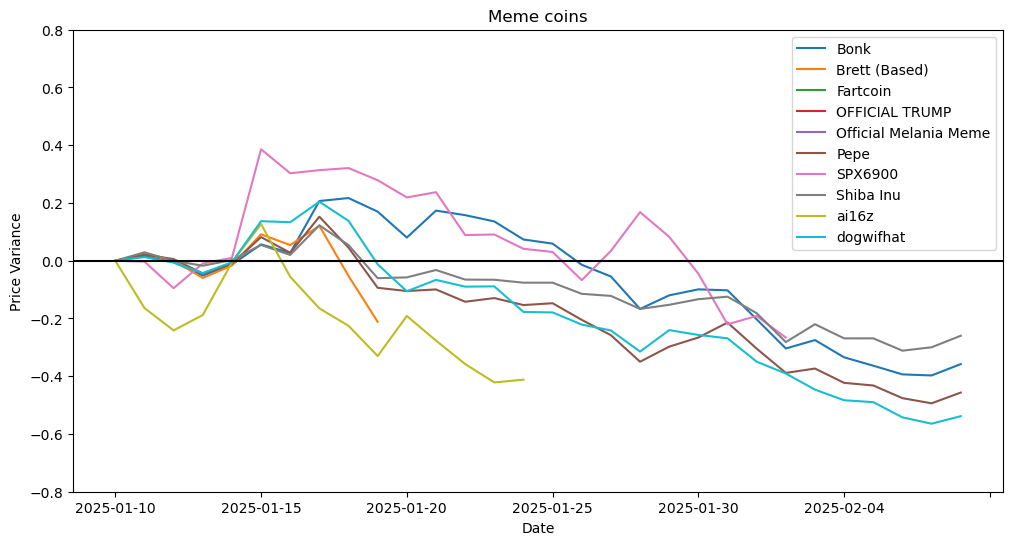

In [14]:
# Plot of meme coins
df3[df3['first_tag'] == 'memes'].groupby('name')['price_var'].plot(legend=True, figsize = [12,6], xlabel = 'Date', ylim = [-0.8,0.8], ylabel = 'Price Variance', title = "Meme coins")
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

Let's now import the top 1'000 coins (from a csv that I saved in another notebook using the same API of CoinMarketCap) so that we can group by category and see the price variance by category.

In [12]:
df_1000 = pd.read_csv('data_downloaded/coinmarketcap_data_20250110-20250208_top_1000.csv')

In [13]:
df_1000_1 = df_1000.copy()

In [14]:
# Create df that has only prices of the first date. We will join this to the original dataframe to get a column with price_T0
df_1000_price_T0 = df_1000_1[['id', 'name', 'quote.USD.price', 'date_data']]
df_1000_price_T0 = df_1000_price_T0[df_1000_price_T0['date_data'] == '2025-01-12']

# Create col price_T0
df_1000_price_T0['price_T0'] = df_1000_price_T0['quote.USD.price'] 

# Join back to initial df
df_1000_1 = df_1000_1.merge(df_1000_price_T0[['id', 'price_T0']], how='left', left_on='id', right_on='id', suffixes=('_left', '_right'))

# Create price variance = price_Tx / price_T0 - 1
# The purpose of this metric is to plot the variance of the price, rather than the price itself, so that we can put all coins on 1 chart and have them comparable.
df_1000_2 = df_1000_1
df_1000_2['price_var'] = df_1000_2['quote.USD.price'] / df_1000_2['price_T0'] - 1

# Get the first tag to have categories
df_1000_2['first_tag'] = df_1000_2['tags'].str.extract(r'(\w+)')

# Drop Stablecoins
df_1000_2 = df_1000_2[df_1000_2['first_tag'] != 'stablecoin']

# Drop USDC because the first_tag wasn't labled stablecoin
df_1000_2 = df_1000_2[df_1000_2['name'] != 'USDC']

# Drop Syscoin because there's only 1 row
df_1000_2 = df_1000_2[df_1000_2['name'] != 'Syscoin']

# Drop "POL (prev. MATIC)" because strange data
df_1000_2 = df_1000_2[df_1000_2['name'] != 'POL (prev. MATIC)']

# Filter on categories we want to see
df_1000_2 = df_1000_2[df_1000_2['first_tag'].isin(['bitcoin', 'mineable', 'memes', 'ai', 'defi', 'gaming', 'cybersecurity'])]

# replacing values of ("first_tag" == bitcoin) with NULL because they are incorrect (certain coins are categorised as bitcoin when there are not)
df_1000_2['first_tag'] = df_1000_2['first_tag'].where(~df_1000_2['first_tag'].isin(['bitcoin']),'other')
# replacing values of bitcoin's tag from "mineable" to "bitcoin" 
df_1000_2['first_tag'] = df_1000_2['first_tag'].where(~df_1000_2['name'].isin(['Bitcoin']),'bitcoin')

In [15]:
df_1000_3 = df_1000_2.copy()

In [16]:
# Group by categories and average the price_var
df_1000_3 = df_1000_3.groupby(['first_tag', 'date_data'])['price_var'].mean().reset_index(name="price_var")
#define index column
df_1000_3.set_index('date_data', inplace=True)

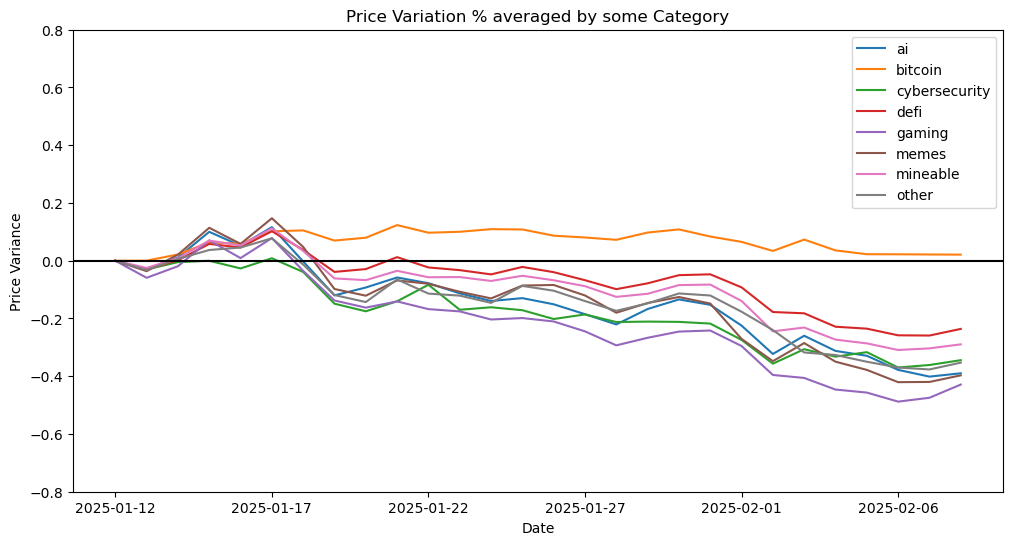

In [17]:
# Category plot
df_1000_3.groupby('first_tag')['price_var'].plot(legend=True, figsize = [12,6], xlabel = 'Date', ylim = [-0.8,0.8], ylabel = 'Price Variance', title = "Price Variation % averaged by some Category")
plt.legend(loc='upper right')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

Once again, all the categories fall in comparision to bitcoin (orange line). There are many more categories, but here we selected some of the most popular ones.